## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Input

There is one input which is an evenly spaced array of points on the positive number line

In [2]:
generic_X = np.linspace(0,5,200)
generic_X_dense = np.linspace(0,5,300)
generic_X_denser = np.linspace(0,5,600)

### Activation function

In [45]:
def single_sigmoid(x):
    x = np.float64(x)
    x=min(20,x)
    x=max(-20,x)
    return 1/(1+np.exp(-x))
sigmoid = np.vectorize(single_sigmoid)

## Simulating the predications from a simple neural network

Nomenclature for neural network names:
$$<activation>\_<hyperparameters>\_<hidden\_layers>\newline\_\_<hidden\_layer\_1\_neurons>\_<hidden\_layer\_2\_neurons>...$$

In [46]:
def sigmoid_wbh_1__1(w1=1,b1=1,h1=1,b3=0,X=generic_X):
    y1 = h1*sigmoid(w1*X + b1)
    Y = y1+b3
    return Y

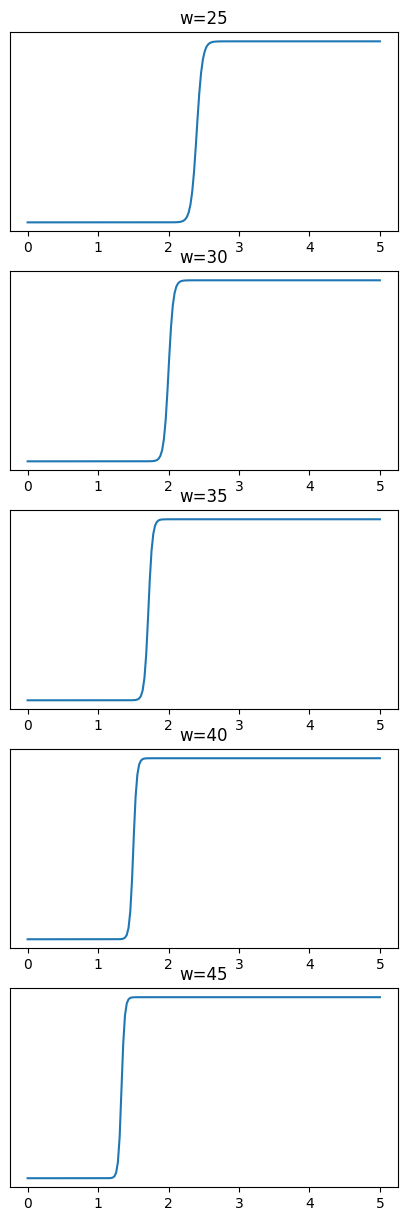

In [47]:
plt.figure(figsize=(5,15))
W = np.arange(25,50,5)
B = np.arange(-25,-50,-5)

ind_i=1
for w in W:
    plt.subplot(5,1,ind_i)
    plt.yticks([])
    plt.plot(generic_X,sigmoid_wbh_1__1(w1=w,b1=-60))
    plt.title(f"w={w}")    
    ind_i+=1
plt.show()

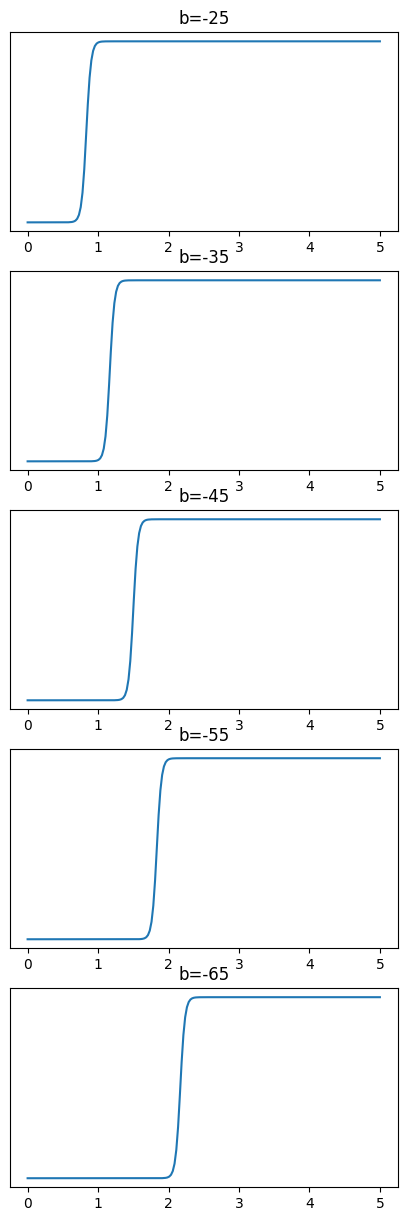

In [48]:
plt.figure(figsize=(5,15))
W = np.arange(25,50,5)
B = np.arange(-25,-75,-10)

ind_i=1
for b in B:
    plt.subplot(5,1,ind_i)
    plt.yticks([])
    plt.plot(generic_X,sigmoid_wbh_1__1(w1=30,b1=b))
    plt.title(f"b={b}")    
    ind_i+=1
plt.show()

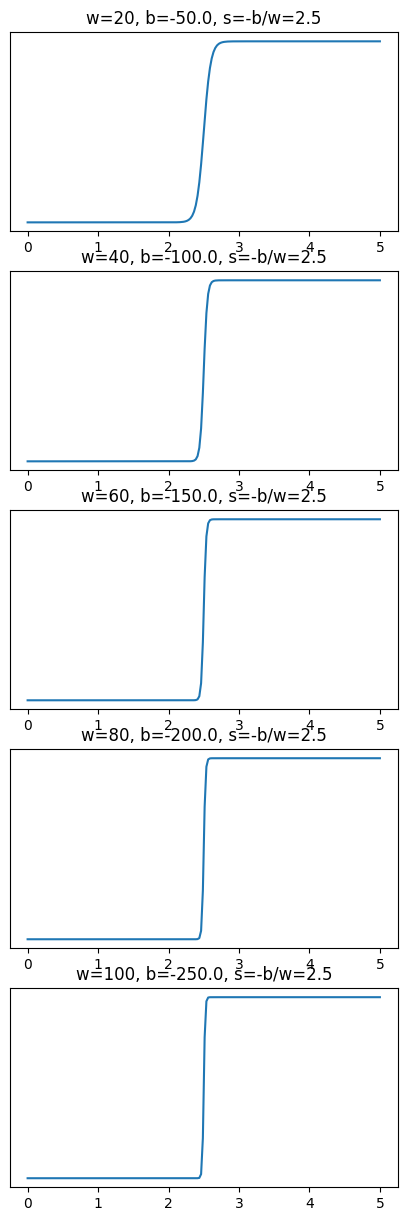

In [49]:
plt.figure(figsize=(5,15))
W = np.arange(20,120,20)
B = -2.5*W

ind_i=1
for w in range(len(W)):
    plt.subplot(5,1,ind_i)
    plt.yticks([])
    plt.plot(generic_X,sigmoid_wbh_1__1(w1=W[w],b1=B[w]))
    plt.title(f"w={W[w]}, b={B[w]}, s=-b/w=2.5")    
    ind_i+=1
plt.show()

In [50]:
def sigmoid_wbh_1__2(w1=120,b1=-60,h1=1,w2=120,b2=-60,h2=1,b3=0,X=generic_X):
    y1 = h1*sigmoid(w1*X + b1)
    y2 = h2*sigmoid(w2*X+b2)
    Y = y1+y2+b3
    return Y

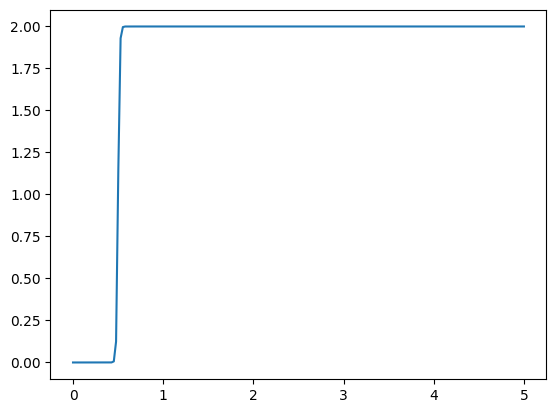

In [51]:
plt.plot(generic_X,sigmoid_wbh_1__2())
plt.show()

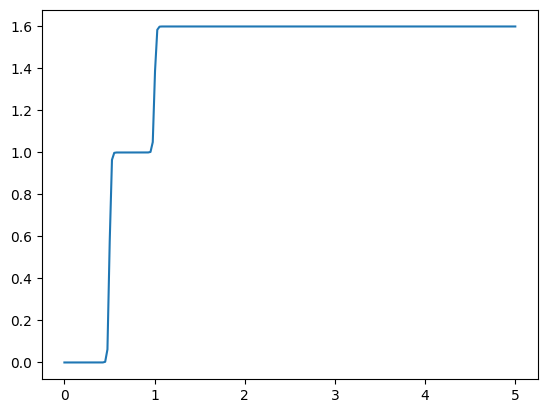

In [52]:
plt.plot(generic_X,sigmoid_wbh_1__2(
    h1=0.6,b1=-120
))
plt.show()

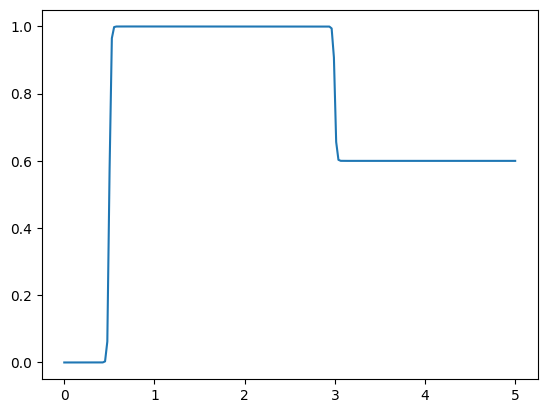

In [53]:
plt.plot(generic_X,sigmoid_wbh_1__2(
    h2=-0.4,b2=-360,h1=1
))
plt.show()

In [54]:
def sigmoid_whs_1__2(w=300,h1=1,s1=2,h2=-1,s2=3,X=generic_X):
    y1 = h1*sigmoid(w*X - s1*w)
    y2 = h2*sigmoid(w*X - s2*w)
    Y = y1+y2
    return Y

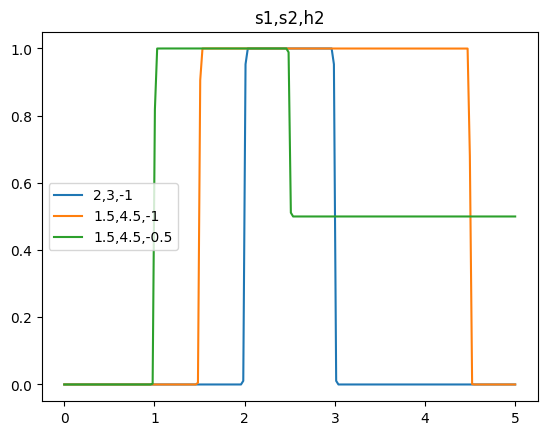

In [55]:
plt.plot(generic_X,sigmoid_whs_1__2(),label="2,3,-1")
plt.plot(generic_X,sigmoid_whs_1__2(s1=1.5,s2=4.5),label="1.5,4.5,-1")
plt.plot(generic_X,sigmoid_whs_1__2(s1=1,s2=2.5,h2=-0.5),label="1.5,4.5,-0.5")
plt.legend()
plt.title("s1,s2,h2")
plt.show()

In [56]:
def sigmoid_hsd_1__2(w=300,h=1,s=2,d=1,X=generic_X):
    y1 = h*sigmoid(w*X - s*w)
    y2 = (-h)*sigmoid(w*X - (s+d)*w)
    Y = y1+y2
    return Y

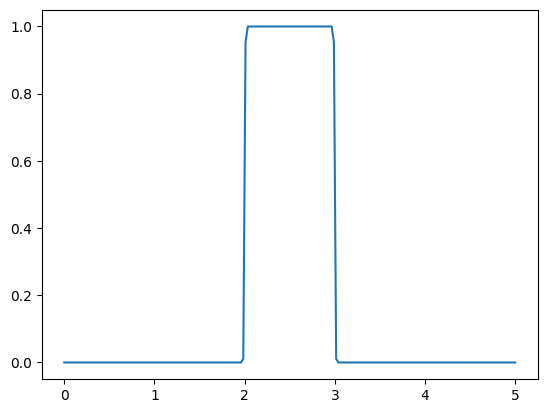

In [57]:
plt.plot(generic_X,sigmoid_hsd_1__2())
plt.show()

In [58]:
def combine(ys: list):
    ys=np.array(ys)
    Y = np.zeros(len(ys[0]))
    for i in range(len(ys[0])):
        # if (np.sum(ys<0)!=0):
        #     Y[i]=np.min(ys[:,i])
        # else:
        #     Y[i] = np.max(ys[:,i])
        Y[i] = np.sum(ys[:,i])
    return Y

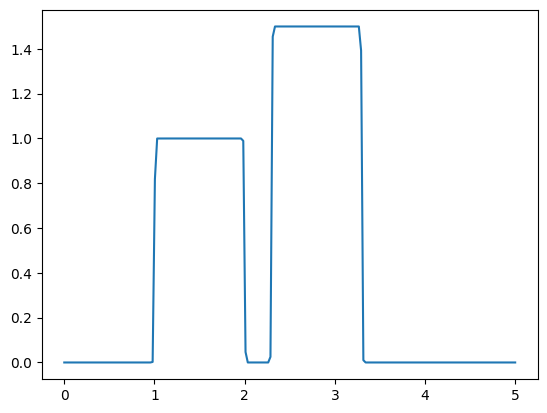

In [59]:
plt.plot(generic_X,combine([sigmoid_hsd_1__2(s=1,d=1,h=1),sigmoid_hsd_1__2(s=2.3,d=1,h=1.5)]))
plt.show()

In [60]:
def approximate(g,X=generic_X):
    g = np.vectorize(g)
    Y = g(X)
    ys = []
    for i in range(5):
        ys.append(sigmoid_hsd_1__2(s=i,h=np.mean(Y[int(len(X)/5)*i:int(len(X)/5)*(i+1)])))
    Y_predicted = combine(ys)
    return (Y,Y_predicted)

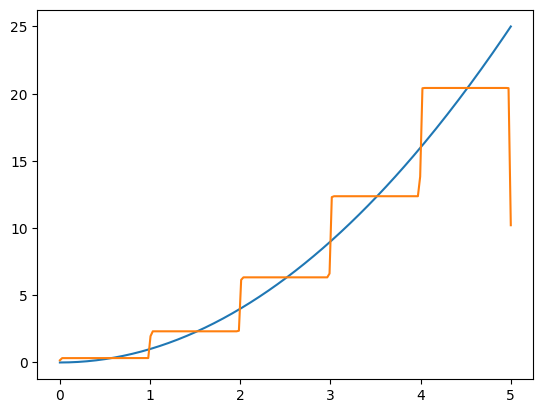

In [61]:
def x2(x):
    return x**2

results = approximate(x2)
plt.plot(generic_X,results[0])
plt.plot(generic_X,results[1])
plt.show()

In [62]:
def approximate_2(g,n=5,X=generic_X):
    g = np.vectorize(g)
    Y = g(X)
    ys = []
    for i in range(n):
        ys.append(sigmoid_hsd_1__2(
            s=i*((np.max(X)-np.min(X))/n),
            h=np.mean(Y[int(round(len(X)/n))*i:int(round(len(X)/n))*(i+1)]),
            d=(np.max(X)-np.min(X))/n,
            X=X
        ))
    Y_predicted = combine(ys)
    return (Y,Y_predicted)

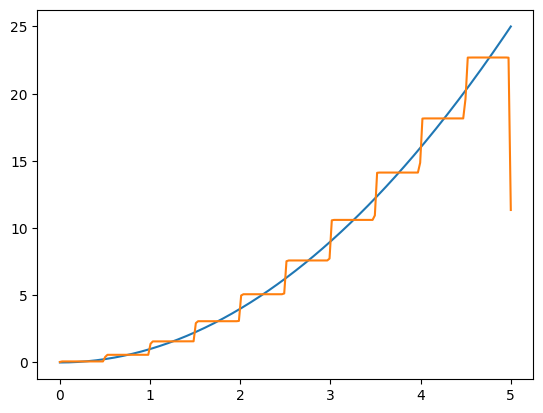

In [63]:
results_2 = approximate_2(x2,n=10)
plt.plot(generic_X,results_2[0])
plt.plot(generic_X,results_2[1])
plt.show()

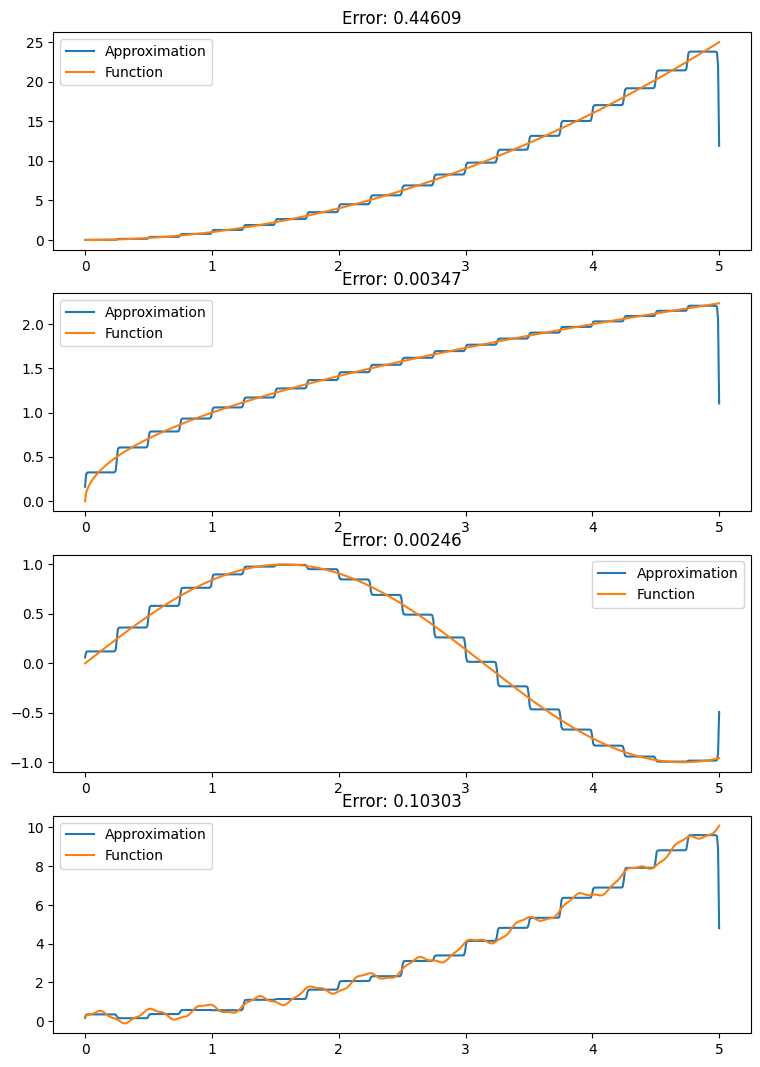

In [64]:
def xr(x):
    return np.sqrt(x)

def sinx(x):
    return np.sin(x)

def g1(x):
    return 0.2+0.4*(x**2)+0.3*np.sin(x*15)+0.05*np.cos(x*50)

funcs = [x2,xr,sinx,g1]
N = 20
X_USE = generic_X_denser

figure = plt.figure(figsize=(9,13))
for i in range(len(funcs)):
    plt.subplot(len(funcs),1,i+1)
    Y = approximate_2(funcs[i],n=N,X=X_USE)
    err = np.sum(np.square(Y[0]-Y[1]))/len(Y[0])
    plt.plot(generic_X_denser,Y[1],label="Approximation")
    plt.plot(generic_X_denser,Y[0],label="Function")
    plt.title(f"Error: {round(err,5)}")
    plt.legend()
plt.show()